In [1]:
using Measurements,LaTeXStrings;
using Plots;
import PyPlot;
pyplot();default(framestyle = :box, minorticks = 5, size=(500,350));

In [2]:
mπ1=measurement(1.661,0.013);
mη1=measurement(1.855,0.009);
mKstar=measurement(1.718,0.018);

In [3]:
schwingerrelation(m0,mhalf,m1)=(8*mhalf*(mhalf-m1)+3*m1^2-m0*(4*mhalf-m1))/(4*mhalf-m1-3*m0);

In [4]:
# function getKηL(mπ,mηH,α)
#     θ=α-atand(sqrt(2))
#     c=2/3*mπ*(3*sqrt(2)*mηH*tand(θ)+mπ*(-4+sqrt(2)*tand(θ)))
#     b=-2/3*(3*sqrt(2)*mηH*tand(θ)+mπ*(-8+5*sqrt(2)*tand(θ)))
#     a=8/3*(-1+sqrt(2)*tand(θ))
#     Δ=b^2-4*a*c 
#     mK=0.0
#     if tand(θ)>=0
#         mK=(-b+sqrt(Δ))/(2*a)
#     else 
#         mK=(-b-sqrt(Δ))/(2*a)
#     end
#     mηL=((4+2*sqrt(2)*tand(θ))*mK-(1+2*sqrt(2)*tand(θ))*mπ)/3
#     return (mηL,mK)
# end
function getKηL(mπ,mηH,α)
    θ=α-atand(sqrt(2))
    mK=(2*sqrt(2)*mπ-3*mηH*tand(θ)-mπ*tand(θ))/(2*sqrt(2)-4*tand(θ))
    mηL=(mηH*tand(θ)*(sqrt(2)+tand(θ))-mπ*(1+tand(θ)^2))/(sqrt(2)*tand(θ)-1)
    return (mηL,mK)
end

getKηL (generic function with 1 method)

In [5]:
function getKηH(mπ,mηL,α)
    θ=α-atand(sqrt(2))
    mK=((2*sqrt(2)*tand(θ)+1)*mπ+3*mηL)/(4+2*sqrt(2)*tand(θ))
    mηH=(8*mK^2-8*mK*mπ+3*mπ^2-mηL*(4*mK-mπ))/(4*mK-mπ-3*mηL)
    return (mηH,mK)
end

getKηH (generic function with 1 method)

### mixing angle by $m_{K^*}$ PDG region

In [6]:
function αfunc1(m0,mhalf,m1;lower=true)
    m0p=schwingerrelation(m0,mhalf,m1)
    tmp=0.0
    if lower
        tmp=atand((4*mhalf-m1-3*m0p)/(2*sqrt(2)*(m1-mhalf)))+atand(sqrt(2))
    else 
        tmp=atand((4*mhalf-m1-3*m0)/(2*sqrt(2)*(m1-mhalf)))+atand(sqrt(2))
    end
    return tmp
end

αfunc1 (generic function with 1 method)

In [7]:
αfunc1(mη1,mKstar,mπ1;lower=true)

30.0 ± 13.0

#### since $m_{\eta_1(1710)}$ is $\eta_{1L}$

Union of $m_{K^*(1680)}$ adopted in PDG

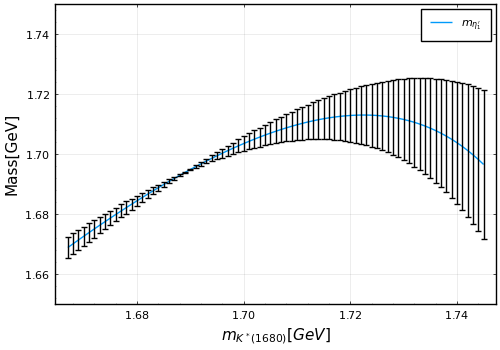

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [8]:
let mKv=collect(1.667:0.001:1.745)
    num=length(mKv)
    m0v=zeros(Measurement{Float64},num)
    for i in 1:1:num
        m0v[i]=schwingerrelation(mη1,mKv[i],mπ1)
    end
    plot(mKv,m0v,xlabel=L"m_{K^*(1680)}[GeV]",ylabel="Mass[GeV]",label=L"m_{\eta_1'}",ylims=(1.65,1.75))
end

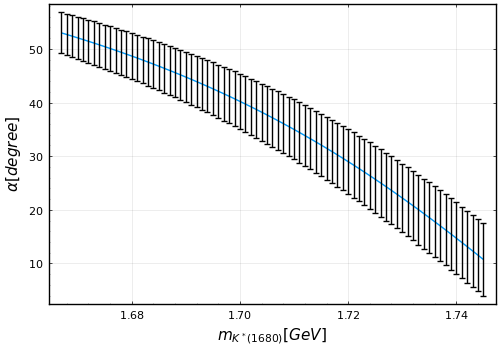

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [9]:
let mKv=collect(1.667:0.001:1.745)
    num=length(mKv)
    αv=zeros(Measurement{Float64},num)
    for i in 1:1:num
        αv[i]=αfunc1(mη1,mKv[i],mπ1;lower=true)
    end
    plot(mKv,αv,xlabel=L"m_{K^*(1680)}[GeV]",ylabel=L"\alpha[degree]",label=false)
end

### mixing by $m_{K^*}$ in a wider range

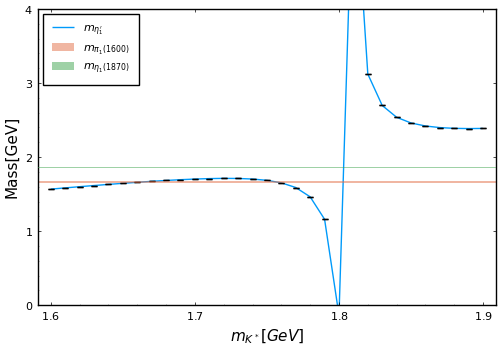

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [10]:
let mKv=collect(1.6:0.01:1.9)
    num=length(mKv)
    m0v=zeros(Measurement{Float64},num)
    for i in 1:1:num
        m0v[i]=schwingerrelation(mη1.val,mKv[i],mπ1.val)
    end
    plot(mKv,m0v,xlabel=L"m_{K^*}[GeV]",ylabel="Mass[GeV]",label=L"m_{\eta_1'}",ylims=(0.0,4.0),grid=false,legend=:topleft)
    plot!([1.661-0.013,1.661+0.013],seriestype=:hspan,seriesalpha=0.5,label=L"m_{\pi_1(1600)}")
    plot!([1.855-0.009,1.855+0.009],seriestype=:hspan,seriesalpha=0.5,label=L"m_{\eta_1(1870)}")
end

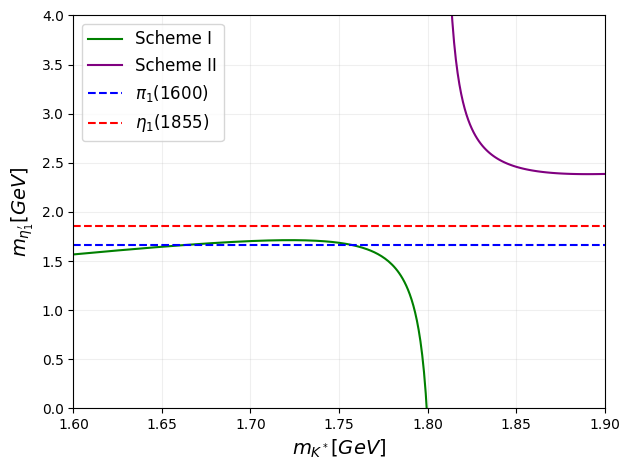

In [65]:
# using PyPlot
let mKv1=collect(1.6:0.001:1.8),mKv2=collect(1.809:0.001:1.9)
    num1=length(mKv1)
    m0v1=zeros(Float64,num1)
    for i in 1:1:num1
        m0v1[i]=schwingerrelation(mη1.val,mKv1[i],mπ1.val)
    end
    num2=length(mKv2)
    m0v2=zeros(Float64,num2)
    for i in 1:1:num2
        m0v2[i]=schwingerrelation(mη1.val,mKv2[i],mπ1.val)
    end
    
    fig, ax = PyPlot.subplots()
    ax.plot(mKv1,m0v1,color="green",label="Scheme I")
    ax.plot(mKv2,m0v2,color="purple",label="Scheme II")
    PyPlot.hlines(1.661,mKv1[1],mKv2[end],color="blue",ls=:dashed,label=L"\pi_1(1600)")
    PyPlot.hlines(1.855,mKv1[1],mKv2[end],color="red",ls=:dashed,label=L"\eta_1(1855)")
    PyPlot.ylim(0,4)
    PyPlot.xlim(1.6,1.9)
    PyPlot.grid(alpha=0.2)
    PyPlot.xlabel(L"m_{K^*}[GeV]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.ylabel(L"m_{\eta_1'}[GeV]",fontsize=14,fontfamily="Times New Roman")
    ax.legend(frameon=true,fontsize=12,loc = "upper left")
    PyPlot.tight_layout()
    PyPlot.savefig("./images/mass_dis.pdf")
end

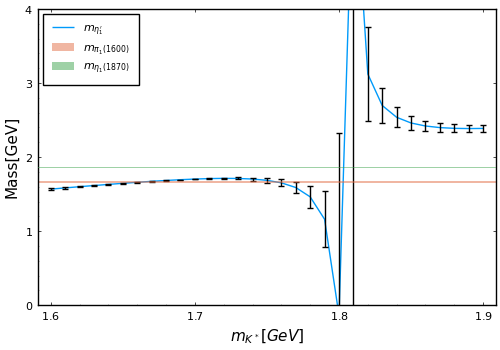

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [11]:
let mKv=collect(1.6:0.01:1.9)
    num=length(mKv)
    m0v=zeros(Measurement{Float64},num)
    for i in 1:1:num
        m0v[i]=schwingerrelation(mη1,mKv[i],mπ1)
    end
    plot(mKv,m0v,xlabel=L"m_{K^*}[GeV]",ylabel="Mass[GeV]",label=L"m_{\eta_1'}",ylims=(0.0,4.0),grid=false,legend=:topleft)
    plot!([1.661-0.013,1.661+0.013],seriestype=:hspan,seriesalpha=0.5,label=L"m_{\pi_1(1600)}")
    plot!([1.855-0.009,1.855+0.009],seriestype=:hspan,seriesalpha=0.5,label=L"m_{\eta_1(1870)}")
end

In [12]:
mKsepmin,mKsepmax=1.75,1.83

(1.75, 1.83)

#### when $m_{\eta_{new}}$ is $m_{\eta_L}$

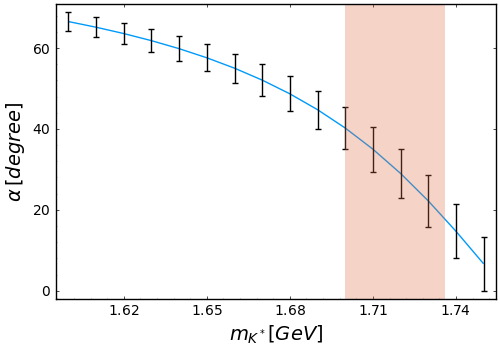

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [13]:
let mKv=collect(1.6:0.01:mKsepmin)
    num=length(mKv)
    αv=zeros(Measurement{Float64},num)
    for i in 1:1:num
        αv[i]=αfunc1(mη1,mKv[i],mπ1;lower=true)
    end
    
    plot(mKv,αv,xlabel=L"m_{K^*}[GeV]",ylabel=L"α\, [degree]",label=false,grid=false)
    plot!([1.718-0.018,1.718+0.018],seriestype=:vspan,seriesalpha=0.3,label=false)
    plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14)
end

#### when $m_{\eta_{new}}$ is $m_{\eta_H}$

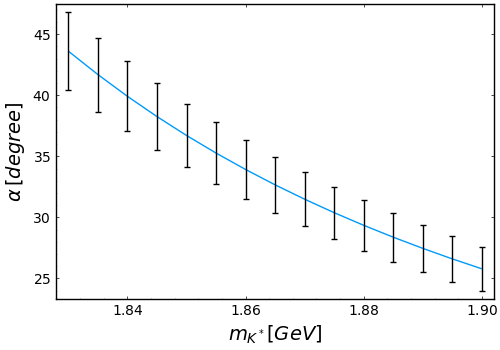

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [14]:
let mKv=collect(mKsepmax:0.005:1.9)
    num=length(mKv)
    αv=zeros(Measurement{Float64},num)
    for i in 1:1:num
        αv[i]=αfunc1(mη1,mKv[i],mπ1;lower=false)
    end
    plot(mKv,αv,xlabel=L"m_{K^*}[GeV]",ylabel=L"α\, [degree]",label=false,grid=false)
    plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14)
end

## Radiative decay of $J/\psi$

In [15]:
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*x*z-2*y*z;
p3(m,m1,m2)=sqrt(λ(m^2,m1^2,m2^2))/(2*m);

#### joint decay

In [18]:
mJψ,mγ,mη,mηp=3.0969,0.0,0.547,0.95778

(3.0969, 0.0, 0.547, 0.95778)

##### when $m_{\eta_{new}}$ is $m_{\eta_L}$

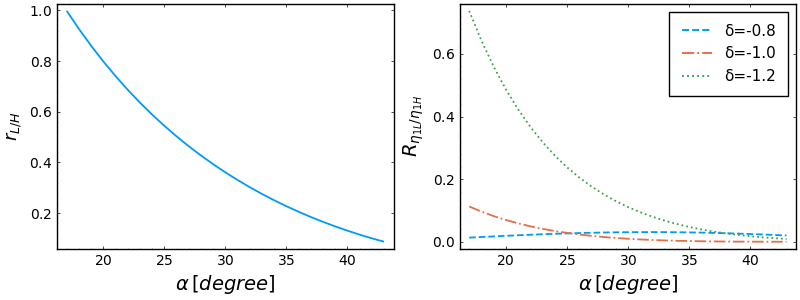

In [52]:
let αv=collect(17:1:43) 
    
    function tmpf1(mη1L,mη1H,α,δ;R=0.93,αp=40,ΓR=1.0)
        qL,qH=p3(mJψ,mγ,mη1L),p3(mJψ,mγ,mη1H)
        kL,kH=p3(mη1L,mη,mηp),p3(mη1H,mη,mηp)
        num=qL^3*(sqrt(2)*cosd(α)-R*sind(α))^2*kL^3*((1+δ)*tand(2*αp)*(cosd(α)+R*sind(α))+2*δ*(R*cosd(α)-sind(α)))^2
        den=qH^3*(sqrt(2)*sind(α)+R*cosd(α))^2*kH^3*((1+δ)*tand(2*αp)*(sind(α)-R*cosd(α))+2*δ*(R*sind(α)+cosd(α)))^2
        return num/den*ΓR*mη1H^4/mη1L^4*(mJψ^2+mη1L^2)/(mJψ^2+mη1H^2)
    end
             
    function tmpf(mπ,mη1H,α,δ)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        return tmpf1(mη1L,mη1H,α,δ)
    end
    
    function tmpf10(mηL,mηH,α;R=0.93)
        q1,q2=p3(mJψ,mγ,mηL),p3(mJψ,mγ,mηH)
        return q1^3/q2^3*(sqrt(2)*cosd(α)-R*sind(α))^2/(sqrt(2)*sind(α)+R*cosd(α))^2*(1+mJψ^2/mηL^2)/(1+mJψ^2/mηH^2)
    end
    
    function tmpf0(mπ,mη1H,α)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        return tmpf10(mη1L,mη1H,α)
    end
    
    num=length(αv)
    Rv1=zeros(Float64,num)
    
    for i in 1:1:num 
        Rv1[i]=tmpf0(mπ1.val,mη1.val,αv[i])
    end
    p1=plot(αv,Rv1,label=false,lw=1.3
        ,xlabel=L"\alpha\, [degree]",ylabel=L"r_{L/H}")
    plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=13,legendfontsize=11,grid=false)
    
    num=length(αv)
    Rv2=zeros(Float64,num)
    Rv222=zeros(Float64,num)
    Rv22222=zeros(Float64,num)
    for i in 1:1:num 
        Rv2[i]=tmpf(mπ1.val,mη1.val,αv[i],-0.8)
        Rv222[i]=tmpf(mπ1.val,mη1.val,αv[i],-1.0)
        Rv22222[i]=tmpf(mπ1.val,mη1.val,αv[i],-1.2)
    end
    p2=plot(xlabel=L"\alpha\, [degree]",ylabel=L"R_{\eta_{1L}/\eta_{1H}}")
    plot!(αv,Rv2,label="δ=-0.8",ls=:dash,lw=1.3)
    plot!(αv,Rv222,label="δ=-1.0",ls=:dashdot,lw=1.3)
    plot!(αv,Rv22222,label="δ=-1.2",ls=:dot,lw=1.3)
    plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14,legendfontsize=11,grid=false)
    
    plot(p1,p2,layout=(1,2),size=(800,300))
end

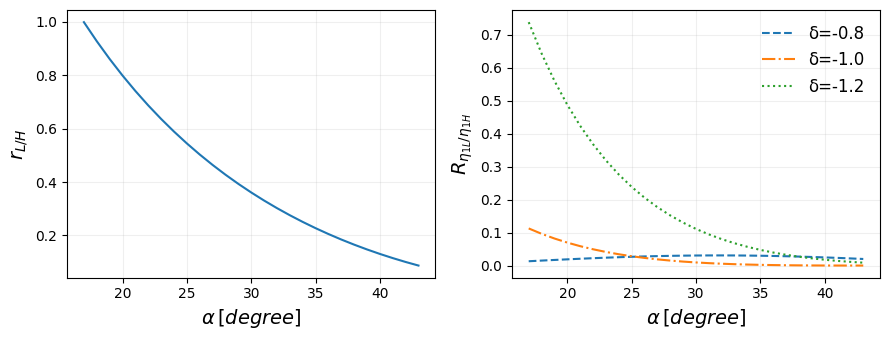

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [98]:
let αv=collect(17:1:43) 
    
    function tmpf1(mη1L,mη1H,α,δ;R=0.93,αp=40,ΓR=1.0)
        qL,qH=p3(mJψ,mγ,mη1L),p3(mJψ,mγ,mη1H)
        kL,kH=p3(mη1L,mη,mηp),p3(mη1H,mη,mηp)
        num=qL^3*(sqrt(2)*cosd(α)-R*sind(α))^2*kL^3*((1+δ)*tand(2*αp)*(cosd(α)+R*sind(α))+2*δ*(R*cosd(α)-sind(α)))^2
        den=qH^3*(sqrt(2)*sind(α)+R*cosd(α))^2*kH^3*((1+δ)*tand(2*αp)*(sind(α)-R*cosd(α))+2*δ*(R*sind(α)+cosd(α)))^2
        return num/den*ΓR*mη1H^4/mη1L^4*(mJψ^2+mη1L^2)/(mJψ^2+mη1H^2)
    end
             
    function tmpf(mπ,mη1H,α,δ)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        return tmpf1(mη1L,mη1H,α,δ)
    end
    
    function tmpf10(mηL,mηH,α;R=0.93)
        q1,q2=p3(mJψ,mγ,mηL),p3(mJψ,mγ,mηH)
        return q1^3/q2^3*(sqrt(2)*cosd(α)-R*sind(α))^2/(sqrt(2)*sind(α)+R*cosd(α))^2*(1+mJψ^2/mηL^2)/(1+mJψ^2/mηH^2)
    end
    
    function tmpf0(mπ,mη1H,α)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        return tmpf10(mη1L,mη1H,α)
    end
    
    num=length(αv)
    Rv1=zeros(Float64,num)
    
    for i in 1:1:num 
        Rv1[i]=tmpf0(mπ1.val,mη1.val,αv[i])
    end
    
    num=length(αv)
    Rv2=zeros(Float64,num)
    Rv222=zeros(Float64,num)
    Rv22222=zeros(Float64,num)
    for i in 1:1:num 
        Rv2[i]=tmpf(mπ1.val,mη1.val,αv[i],-0.8)
        Rv222[i]=tmpf(mπ1.val,mη1.val,αv[i],-1.0)
        Rv22222[i]=tmpf(mπ1.val,mη1.val,αv[i],-1.2)
    end
    
    
    # using PyPlot
    PyPlot.subplots(figsize=(9,3.5))
    
    PyPlot.subplot(1,2,1)
    PyPlot.plot(αv,Rv1)
    PyPlot.grid(alpha=0.2)
    PyPlot.legend(frameon=false)
    PyPlot.xlabel(L"\alpha\, [degree]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.ylabel(L"r_{L/H}",fontsize=14,fontfamily="Times New Roman")
    
    PyPlot.subplot(1,2,2)
    PyPlot.plot(αv,Rv2,label="δ=-0.8",linestyle="dashed",linewidth=1.5)
    PyPlot.plot(αv,Rv222,label="δ=-1.0",linestyle="dashdot",linewidth=1.5)
    PyPlot.plot(αv,Rv22222,label="δ=-1.2",linestyle="dotted",linewidth=1.5)
    PyPlot.grid(alpha=0.2)
    PyPlot.xlabel(L"\alpha\, [degree]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.ylabel(L"R_{\eta_{1L}/\eta_{1H}}",fontsize=14,fontfamily="Times New Roman")
    PyPlot.legend(frameon=false,fontsize=12)
    
#     PyPlot.show()
    PyPlot.tight_layout()
#     PyPlot.savefig("./images/joint_left.png")
    PyPlot.savefig("./images/joint_left.pdf")
end

##### when $m_{\eta_{new}}$ is $m_{\eta_H}$

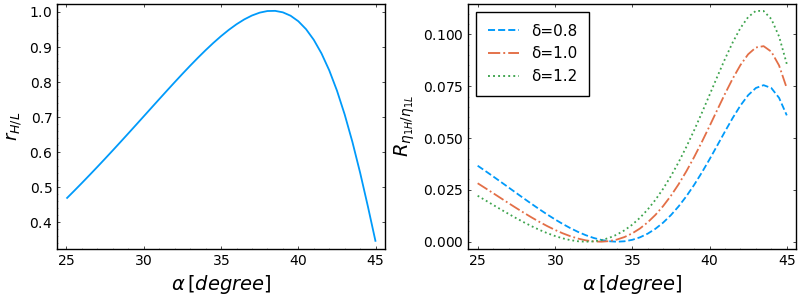

In [44]:
let αv=collect(25:0.5:45) 
    
    
    function tmpf10(mηL,mηH,α;R=0.93)
        q1,q2=p3(mJψ,mγ,mηL),p3(mJψ,mγ,mηH)
        return q1^3/q2^3*(sqrt(2)*cosd(α)-R*sind(α))^2/(sqrt(2)*sind(α)+R*cosd(α))^2*(1+mJψ^2/mηL^2)/(1+mJψ^2/mηH^2)
    end
    
    function tmpf0(mπ,mη1L,α)
        mη1H,mKs=getKηH(mπ,mη1L,α)
        return tmpf10(mη1L,mη1H,α)
    end
    
    num=length(αv)
    Rv1=zeros(Float64,num)
    
    for i in 1:1:num 
        Rv1[i]=1.0/tmpf0(mπ1.val,mη1.val,αv[i])
    end
    p1=plot(αv,Rv1,label=false,lw=1.3,xlabel=L"\alpha\, [degree]"
        ,ylabel=L"r_{H/L}")
    plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=13,legendfontsize=11,grid=false)
    
    function tmpf1(mη1L,mη1H,α,δ;R=0.93,αp=40,ΓR=1.0)
        qL,qH=p3(mJψ,mγ,mη1L),p3(mJψ,mγ,mη1H)
        kL,kH=p3(mη1L,mη,mηp),p3(mη1H,mη,mηp)
        num=qL^3*(sqrt(2)*cosd(α)-R*sind(α))^2*kL^3*((1+δ)*tand(2*αp)*(cosd(α)+R*sind(α))+2*δ*(R*cosd(α)-sind(α)))^2
        den=qH^3*(sqrt(2)*sind(α)+R*cosd(α))^2*kH^3*((1+δ)*tand(2*αp)*(sind(α)-R*cosd(α))+2*δ*(R*sind(α)+cosd(α)))^2
        return num/den*ΓR*mη1H^4/mη1L^4*(mJψ^2+mη1L^2)/(mJψ^2+mη1H^2)
    end
            
    function tmpf(mπ,mη1L,α,δ)
        mη1H,mKs=getKηH(mπ,mη1L,α)
        return tmpf1(mη1L,mη1H,α,δ)
    end
    
    num=length(αv)
    Rv2=zeros(Float64,num)
    Rv222=zeros(Float64,num)
    Rv22222=zeros(Float64,num)
    for i in 1:1:num 
        Rv2[i]=1.0/tmpf(mπ1.val,mη1.val,αv[i],0.8)
        Rv222[i]=1.0/tmpf(mπ1.val,mη1.val,αv[i],1.0)
        Rv22222[i]=1.0/tmpf(mπ1.val,mη1.val,αv[i],1.2)
    end
    p2=plot(xlabel=L"\alpha\, [degree]",ylabel=L"R_{\eta_{1H}/\eta_{1L}}"
        ,legends=:topleft)
    plot!(αv,Rv2,label="δ=0.8",ls=:dash,lw=1.3)
    plot!(αv,Rv222,label="δ=1.0",ls=:dashdot,lw=1.3)
    plot!(αv,Rv22222,label="δ=1.2",ls=:dot,lw=1.3)
    plot!(xtickfontsize=10,ytickfontsize=10,xguidefontsize=14,yguidefontsize=14,legendfontsize=11,grid=false)
    
    plot(p1,p2,layout=(1,2),size=(800,300))
end

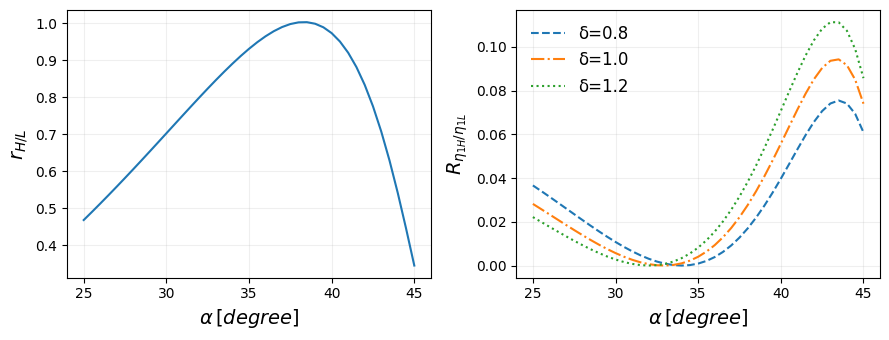

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [102]:
let αv=collect(25:0.5:45) 
    
    
    function tmpf10(mηL,mηH,α;R=0.93)
        q1,q2=p3(mJψ,mγ,mηL),p3(mJψ,mγ,mηH)
        return q1^3/q2^3*(sqrt(2)*cosd(α)-R*sind(α))^2/(sqrt(2)*sind(α)+R*cosd(α))^2*(1+mJψ^2/mηL^2)/(1+mJψ^2/mηH^2)
    end
    
    function tmpf0(mπ,mη1L,α)
        mη1H,mKs=getKηH(mπ,mη1L,α)
        return tmpf10(mη1L,mη1H,α)
    end
    
    num=length(αv)
    Rv1=zeros(Float64,num)
    
    for i in 1:1:num 
        Rv1[i]=1.0/tmpf0(mπ1.val,mη1.val,αv[i])
    end
    
    
    function tmpf1(mη1L,mη1H,α,δ;R=0.93,αp=40,ΓR=1.0)
        qL,qH=p3(mJψ,mγ,mη1L),p3(mJψ,mγ,mη1H)
        kL,kH=p3(mη1L,mη,mηp),p3(mη1H,mη,mηp)
        num=qL^3*(sqrt(2)*cosd(α)-R*sind(α))^2*kL^3*((1+δ)*tand(2*αp)*(cosd(α)+R*sind(α))+2*δ*(R*cosd(α)-sind(α)))^2
        den=qH^3*(sqrt(2)*sind(α)+R*cosd(α))^2*kH^3*((1+δ)*tand(2*αp)*(sind(α)-R*cosd(α))+2*δ*(R*sind(α)+cosd(α)))^2
        return num/den*ΓR*mη1H^4/mη1L^4*(mJψ^2+mη1L^2)/(mJψ^2+mη1H^2)
    end
            
    function tmpf(mπ,mη1L,α,δ)
        mη1H,mKs=getKηH(mπ,mη1L,α)
        return tmpf1(mη1L,mη1H,α,δ)
    end
    
    num=length(αv)
    Rv2=zeros(Float64,num)
    Rv222=zeros(Float64,num)
    Rv22222=zeros(Float64,num)
    for i in 1:1:num 
        Rv2[i]=1.0/tmpf(mπ1.val,mη1.val,αv[i],0.8)
        Rv222[i]=1.0/tmpf(mπ1.val,mη1.val,αv[i],1.0)
        Rv22222[i]=1.0/tmpf(mπ1.val,mη1.val,αv[i],1.2)
    end
    
    # using PyPlot
    PyPlot.subplots(figsize=(9,3.5))
    
    PyPlot.subplot(1,2,1)
    PyPlot.plot(αv,Rv1)
    PyPlot.grid(alpha=0.2)
    PyPlot.legend(frameon=false)
    PyPlot.xlabel(L"\alpha\, [degree]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.ylabel(L"r_{H/L}",fontsize=14,fontfamily="Times New Roman")
    
    PyPlot.subplot(1,2,2)
    #,linestyle='dashed'
    PyPlot.plot(αv,Rv2,label="δ=0.8",linestyle="dashed",linewidth=1.5)
    PyPlot.plot(αv,Rv222,label="δ=1.0",linestyle="dashdot",linewidth=1.5)
    PyPlot.plot(αv,Rv22222,label="δ=1.2",linestyle="dotted",linewidth=1.5)
    PyPlot.grid(alpha=0.2)
    PyPlot.xlabel(L"\alpha\, [degree]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.ylabel(L"R_{\eta_{1H}/\eta_{1L}}",fontsize=14,fontfamily="Times New Roman")
    PyPlot.legend(frameon=false,fontsize=12)
    
#     PyPlot.show()
    PyPlot.tight_layout()
    PyPlot.savefig("./images/joint_right.png")
#     PyPlot.savefig("./images/joint_right.pdf")
end

## $J/\psi\rightarrow VH$

In [57]:
mρ,mKstarc=0.77,0.895

(0.77, 0.895)

#### VVV1

In [54]:
function ampsqVVV1(m,m1,m2)
    return p3(m,m1,m2)^2*(2*m^2+m1^2+2*m2^2)/(2*m2^2)
end

ampsqVVV1 (generic function with 1 method)

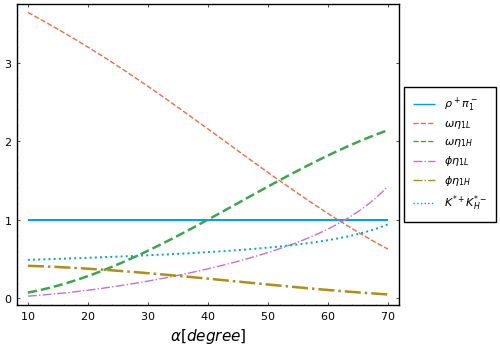

In [60]:
let αv=collect(10:1:70),mJ=3.0969,mω=0.782,mϕ=1.019461
          
    function tmpf(mπ,mη1H,α;R=0.93)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        a=p3(mJ,mρ,mπ1.val)*ampsqVVV1(mJ,mρ,mπ1.val) #*3
        b=p3(mJ,mη1L,mω)*ampsqVVV1(mJ,mη1L,mω)*cosd(α)^2
        c=p3(mJ,mη1H,mω)*ampsqVVV1(mJ,mη1H,mω)*sind(α)^2
        d=p3(mJ,mη1L,mϕ)*ampsqVVV1(mJ,mη1L,mϕ)*sind(α)^2*R^4
        e=p3(mJ,mη1H,mϕ)*ampsqVVV1(mJ,mη1H,mϕ)*cosd(α)^2*R^4
        f=R^2*p3(mJ,mKstarc,mKs)*ampsqVVV1(mJ,mKstarc,mKs) #*4
        return (a,b,c,d,e,f)
    end
    num=length(αv)
    Rv1=zeros(Float64,num)
    Rv2=zeros(Float64,num)
    Rv3=zeros(Float64,num)
    Rv4=zeros(Float64,num)
    Rv5=zeros(Float64,num)
    Rv6=zeros(Float64,num)
    for i in 1:1:num 
        tmp=tmpf(mπ1.val,mη1.val,αv[i])
        Rv1[i]=tmp[1]
        Rv2[i]=tmp[2]
        Rv3[i]=tmp[3]
        Rv4[i]=tmp[4]
        Rv5[i]=tmp[5]
        Rv6[i]=tmp[6]
    end
    
    N=1/Rv1[1]
    plot(αv,Rv1 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\rho^+\pi_1^-",lw=1.4,legend = :outerright,grid=false)
    plot!(αv,Rv2 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\omega\eta_{1L}",lw=1.0,ls=:dash)
    plot!(αv,Rv3 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\omega\eta_{1H}",lw=1.8,ls=:dash)
    plot!(αv,Rv4 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\phi\eta_{1L}",lw=1.0,ls=:dashdot)
    plot!(αv,Rv5 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\phi\eta_{1H}",lw=1.8,ls=:dashdot)
    plot!(αv,Rv6 .*N,xlabel=L"\alpha[degree]"
        ,label=L"K^{*+}K_H^{*-}",lw=1.4,ls=:dot)
#     ylims!((0.0,2.0))
   
end

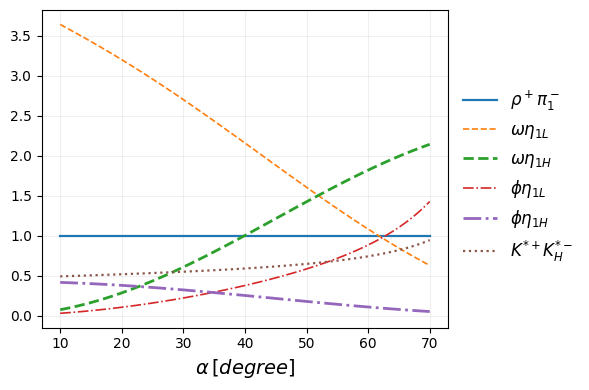

In [106]:
let αv=collect(10:1:70),mJ=3.0969,mω=0.782,mϕ=1.019461
          
    function tmpf(mπ,mη1H,α;R=0.93)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        a=p3(mJ,mρ,mπ1.val)*ampsqVVV1(mJ,mρ,mπ1.val) #*3
        b=p3(mJ,mη1L,mω)*ampsqVVV1(mJ,mη1L,mω)*cosd(α)^2
        c=p3(mJ,mη1H,mω)*ampsqVVV1(mJ,mη1H,mω)*sind(α)^2
        d=p3(mJ,mη1L,mϕ)*ampsqVVV1(mJ,mη1L,mϕ)*sind(α)^2*R^4
        e=p3(mJ,mη1H,mϕ)*ampsqVVV1(mJ,mη1H,mϕ)*cosd(α)^2*R^4
        f=R^2*p3(mJ,mKstarc,mKs)*ampsqVVV1(mJ,mKstarc,mKs) #*4
        return (a,b,c,d,e,f)
    end
    num=length(αv)
    Rv1=zeros(Float64,num)
    Rv2=zeros(Float64,num)
    Rv3=zeros(Float64,num)
    Rv4=zeros(Float64,num)
    Rv5=zeros(Float64,num)
    Rv6=zeros(Float64,num)
    for i in 1:1:num 
        tmp=tmpf(mπ1.val,mη1.val,αv[i])
        Rv1[i]=tmp[1]
        Rv2[i]=tmp[2]
        Rv3[i]=tmp[3]
        Rv4[i]=tmp[4]
        Rv5[i]=tmp[5]
        Rv6[i]=tmp[6]
    end
    
    N=1/Rv1[1]
    PyPlot.figure(figsize=(6, 4))
    PyPlot.plot(αv,Rv1 .*N,label=L"\rho^+\pi_1^-",linewidth=1.6)
    PyPlot.plot(αv,Rv2 .*N,label=L"\omega\eta_{1L}",linewidth=1.2,linestyle="dashed")
    PyPlot.plot(αv,Rv3 .*N,label=L"\omega\eta_{1H}",linewidth=2.0,linestyle="dashed")
    PyPlot.plot(αv,Rv4 .*N,label=L"\phi\eta_{1L}",linewidth=1.2,linestyle="dashdot")
    PyPlot.plot(αv,Rv5 .*N,label=L"\phi\eta_{1H}",linewidth=2.0,linestyle="dashdot")
    PyPlot.plot(αv,Rv6 .*N,label=L"K^{*+}K_H^{*-}",linewidth=1.6,linestyle="dotted")
    PyPlot.xlabel(L"\alpha\, [degree]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.grid(alpha=0.2)
    PyPlot.legend(frameon=false,fontsize=12 ,bbox_to_anchor = (1.0, 0.8))
    
    PyPlot.tight_layout()
#     PyPlot.savefig("./images/VVV1.png")
    PyPlot.savefig("./images/VVV1.pdf")
end

### VVV2

In [61]:
function ampsqVVV2(m,m1,m2)
    return p3(m,m1,m2)^2*(m^4+m1^4+m2^4+10*m1^2*m2^2+10*m^2*m1^2+10*m^2*m2^2)/(m1^2*m2^2)
end

ampsqVVV2 (generic function with 1 method)

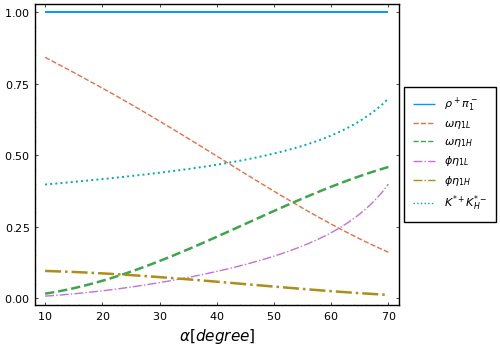

In [63]:
let αv=collect(10:1:70),mJ=3.0969,mω=0.782,mϕ=1.019461
          
    function tmpf(mπ,mη1H,α;R=0.93)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        a=p3(mJ,mρ,mπ1.val)*ampsqVVV2(mJ,mρ,mπ1.val) #*3
        b=p3(mJ,mη1L,mω)*ampsqVVV2(mJ,mη1L,mω)*cosd(α)^2
        c=p3(mJ,mη1H,mω)*ampsqVVV2(mJ,mη1H,mω)*sind(α)^2
        d=p3(mJ,mη1L,mϕ)*ampsqVVV2(mJ,mη1L,mϕ)*sind(α)^2*R^4
        e=p3(mJ,mη1H,mϕ)*ampsqVVV2(mJ,mη1H,mϕ)*cosd(α)^2*R^4
        f=R^2*p3(mJ,mKstarc,mKs)*ampsqVVV2(mJ,mKstarc,mKs) #*4
        return (a,b,c,d,e,f)
    end
    num=length(αv)
    Rv1=zeros(Float64,num)
    Rv2=zeros(Float64,num)
    Rv3=zeros(Float64,num)
    Rv4=zeros(Float64,num)
    Rv5=zeros(Float64,num)
    Rv6=zeros(Float64,num)
    for i in 1:1:num 
        tmp=tmpf(mπ1.val,mη1.val,αv[i])
        Rv1[i]=tmp[1]
        Rv2[i]=tmp[2]
        Rv3[i]=tmp[3]
        Rv4[i]=tmp[4]
        Rv5[i]=tmp[5]
        Rv6[i]=tmp[6]
    end
    
    N=1/Rv1[1]
    plot(αv,Rv1 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\rho^+\pi_1^-",lw=1.4,legend = :outerright,grid=false)
    plot!(αv,Rv2 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\omega\eta_{1L}",lw=1.0,ls=:dash)
    plot!(αv,Rv3 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\omega\eta_{1H}",lw=1.8,ls=:dash)
    plot!(αv,Rv4 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\phi\eta_{1L}",lw=1.0,ls=:dashdot)
    plot!(αv,Rv5 .*N,xlabel=L"\alpha[degree]"
        ,label=L"\phi\eta_{1H}",lw=1.8,ls=:dashdot)
    plot!(αv,Rv6 .*N,xlabel=L"\alpha[degree]"
        ,label=L"K^{*+}K_H^{*-}",lw=1.4,ls=:dot)
#     ylims!((0.0,2.0))
    
end

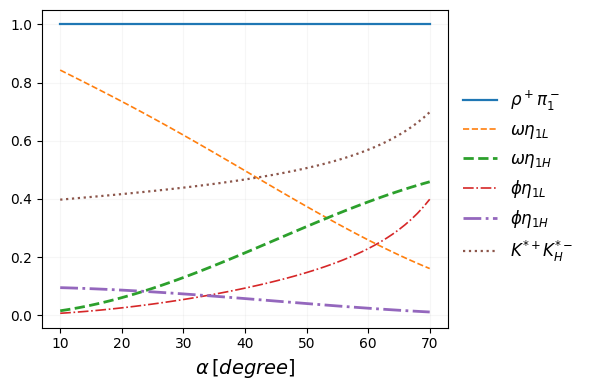

In [110]:
let αv=collect(10:1:70),mJ=3.0969,mω=0.782,mϕ=1.019461
          
    function tmpf(mπ,mη1H,α;R=0.93)
        mη1L,mKs=getKηL(mπ,mη1H,α)
        a=p3(mJ,mρ,mπ1.val)*ampsqVVV2(mJ,mρ,mπ1.val) #*3
        b=p3(mJ,mη1L,mω)*ampsqVVV2(mJ,mη1L,mω)*cosd(α)^2
        c=p3(mJ,mη1H,mω)*ampsqVVV2(mJ,mη1H,mω)*sind(α)^2
        d=p3(mJ,mη1L,mϕ)*ampsqVVV2(mJ,mη1L,mϕ)*sind(α)^2*R^4
        e=p3(mJ,mη1H,mϕ)*ampsqVVV2(mJ,mη1H,mϕ)*cosd(α)^2*R^4
        f=R^2*p3(mJ,mKstarc,mKs)*ampsqVVV2(mJ,mKstarc,mKs) #*4
        return (a,b,c,d,e,f)
    end
    num=length(αv)
    Rv1=zeros(Float64,num)
    Rv2=zeros(Float64,num)
    Rv3=zeros(Float64,num)
    Rv4=zeros(Float64,num)
    Rv5=zeros(Float64,num)
    Rv6=zeros(Float64,num)
    for i in 1:1:num 
        tmp=tmpf(mπ1.val,mη1.val,αv[i])
        Rv1[i]=tmp[1]
        Rv2[i]=tmp[2]
        Rv3[i]=tmp[3]
        Rv4[i]=tmp[4]
        Rv5[i]=tmp[5]
        Rv6[i]=tmp[6]
    end
    
    N=1/Rv1[1]
    PyPlot.figure(figsize=(6, 4))
    PyPlot.plot(αv,Rv1 .*N,label=L"\rho^+\pi_1^-",linewidth=1.6)
    PyPlot.plot(αv,Rv2 .*N,label=L"\omega\eta_{1L}",linewidth=1.2,linestyle="dashed")
    PyPlot.plot(αv,Rv3 .*N,label=L"\omega\eta_{1H}",linewidth=2.0,linestyle="dashed")
    PyPlot.plot(αv,Rv4 .*N,label=L"\phi\eta_{1L}",linewidth=1.2,linestyle="dashdot")
    PyPlot.plot(αv,Rv5 .*N,label=L"\phi\eta_{1H}",linewidth=2.0,linestyle="dashdot")
    PyPlot.plot(αv,Rv6 .*N,label=L"K^{*+}K_H^{*-}",linewidth=1.6,linestyle="dotted")
    PyPlot.xlabel(L"\alpha\, [degree]",fontsize=14,fontfamily="Times New Roman")
    PyPlot.grid(alpha=0.1)
    PyPlot.legend(frameon=false,fontsize=12 ,bbox_to_anchor = (1.0, 0.8))
    
    PyPlot.tight_layout()
#     PyPlot.savefig("./images/VVV2.png")
    PyPlot.savefig("./images/VVV2.pdf")
end